In [4]:
# import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use("fivethirtyeight")
plt.style.use('dark_background')
import seaborn as sns
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV

In [5]:
# read and preview of the data
df = pd.read_csv("/Volumes/GoogleDrive/My Drive/Colab Notebooks/Datasets/HousingData.csv")
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [6]:
# shape of the data
df.shape

(506, 14)

In [7]:
# summary and information about the data
display(df.describe())
display(df.info())

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,486.000000,486.000000,486.000000,486.000000,506.000000,506.000000,486.000000,506.000000,506.000000,506.000000,506.000000,506.000000,486.000000,506.000000
mean,3.611874,11.211934,11.083992,0.069959,0.554695,6.284634,68.518519,3.795043,9.549407,408.237154,18.455534,356.674032,12.715432,22.532806
std,8.720192,23.388876,6.835896,0.255340,0.115878,0.702617,27.999513,2.105710,8.707259,168.537116,2.164946,91.294864,7.155871,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.081900,0.000000,5.190000,0.000000,0.449000,5.885500,45.175000,2.100175,4.000000,279.000000,17.400000,375.377500,7.125000,17.025000
50%,0.253715,0.000000,9.690000,0.000000,0.538000,6.208500,76.800000,3.207450,5.000000,330.000000,19.050000,391.440000,11.430000,21.200000
75%,3.560263,12.500000,18.100000,0.000000,0.624000,6.623500,93.975000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    486 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


None

In [8]:
# check for missing values
df.isnull().sum()

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

In [9]:
# fill the missing values with the mean values
df["CRIM"].fillna(df["CRIM"].mean(),inplace=True)
df["ZN"].fillna(df["ZN"].mean(),inplace=True)
df["INDUS"].fillna(df["INDUS"].mean(),inplace=True)
df["CHAS"].fillna(df["CHAS"].mean(),inplace=True)
df["AGE"].fillna(df["AGE"].mean(),inplace=True)
df["LSTAT"].fillna(df["LSTAT"].mean(),inplace=True)

# verify if there are no missing values
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

# **EDA**

Text(0.5, 1.0, 'Median value of homes (in $1000)')

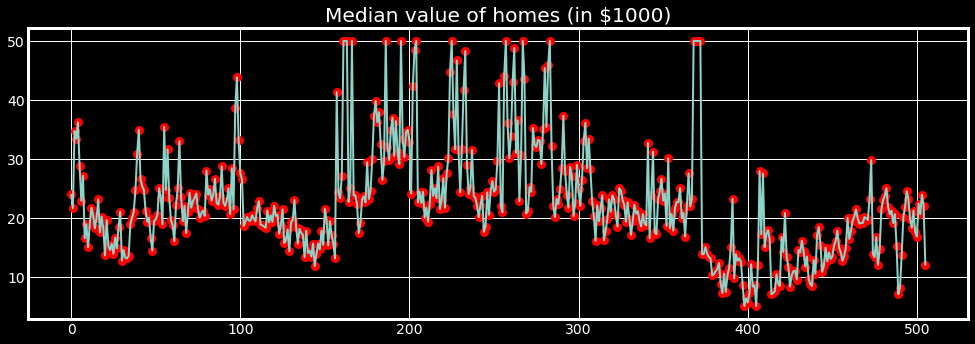

In [10]:
plt.figure(figsize=(15,5))
plt.scatter(df.index, df['MEDV'], color='red', lw=3)
plt.plot(df.index, df['MEDV'],linewidth=2)
plt.title("Median value of homes (in $1000)")

From the chart above, we can see that the values vary and there is no real pattern to show. The maximum value is $50,000 and the minimum value is 5000.

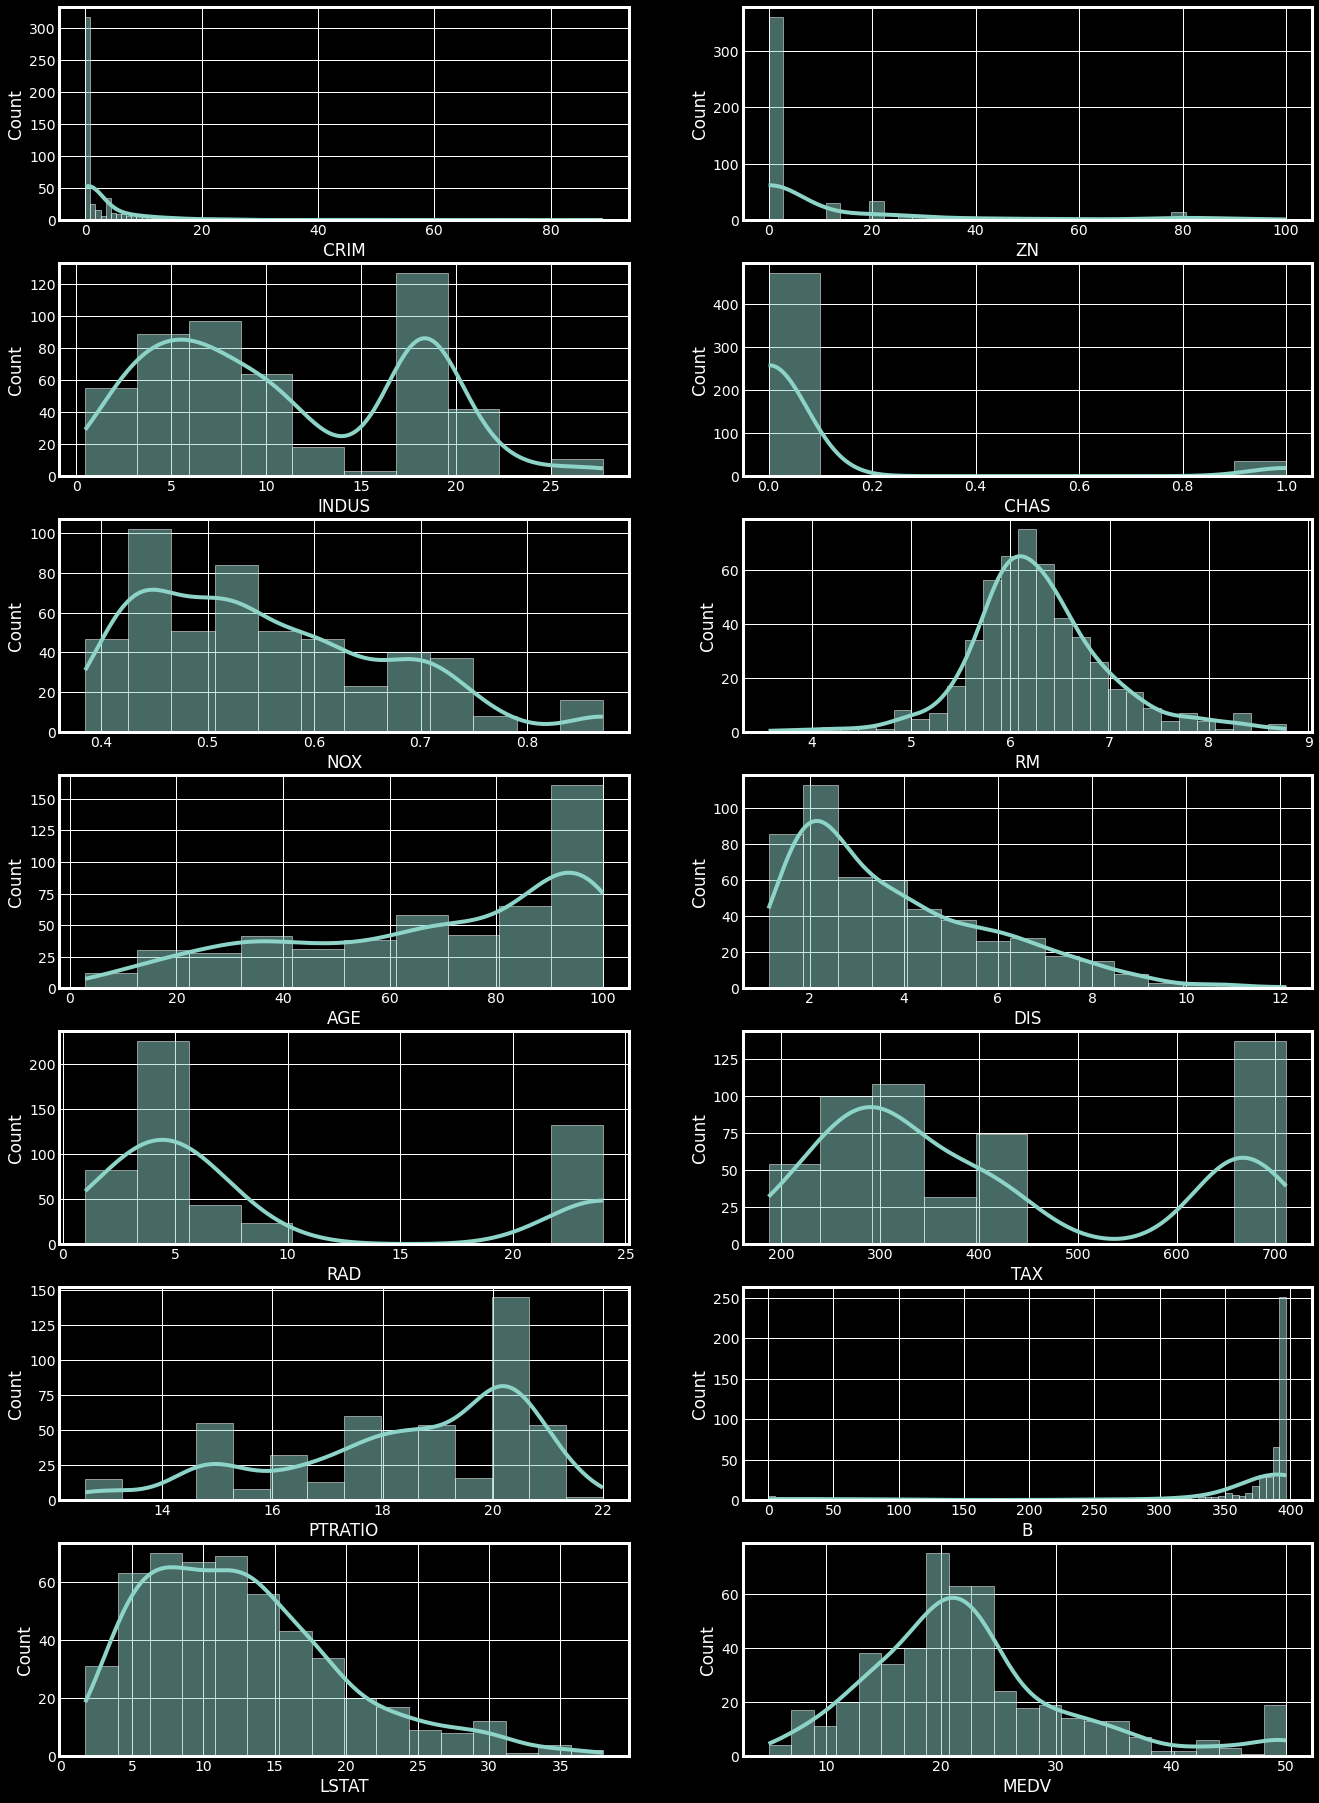

In [11]:
# see how data is distributed across the columns
fig, ax1 = plt.subplots(7,2, figsize=(20,30))
columns = list(df.columns)
k = 0
for i in range(7):
  for j in range(2):
    sns.histplot(df[columns[k]], ax = ax1[i][j], kde=True)
    k += 1

plt.show()

/Users/victoromomola/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


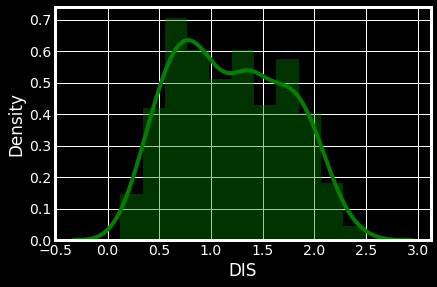

In [12]:
def log_transform(col):
    return np.log(col[0])

df["DIS"]=df[["DIS"]].apply(log_transform, axis=1)
#Plot
sns.distplot(df["DIS"], color = 'green')
plt.grid(True)
plt.show()

In [13]:
# correlation table
corr = df.corr()
corr.style.background_gradient(cmap='Blues').set_precision(2)

/var/folders/bc/5zhwt8p53b1gbm8gb4x9xwrr0000gn/T/ipykernel_63396/2631670490.py:3: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  corr.style.background_gradient(cmap='Blues').set_precision(2)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.00,-0.18,0.39,-0.05,0.41,-0.22,0.34,-0.45,0.61,0.57,0.27,-0.37,0.43,-0.38
ZN,-0.18,1.00,-0.51,-0.04,-0.50,0.32,-0.54,0.57,-0.31,-0.31,-0.40,0.17,-0.41,0.37
INDUS,0.39,-0.51,1.00,0.06,0.74,-0.38,0.61,-0.75,0.59,0.72,0.38,-0.35,0.57,-0.48
CHAS,-0.05,-0.04,0.06,1.00,0.07,0.10,0.08,-0.08,0.00,-0.03,-0.11,0.05,-0.05,0.18
NOX,0.41,-0.50,0.74,0.07,1.00,-0.30,0.71,-0.83,0.61,0.67,0.19,-0.38,0.57,-0.43
RM,-0.22,0.32,-0.38,0.10,-0.30,1.00,-0.24,0.26,-0.21,-0.29,-0.36,0.13,-0.60,0.70
AGE,0.34,-0.54,0.61,0.08,0.71,-0.24,1.00,-0.76,0.45,0.50,0.26,-0.27,0.57,-0.38
DIS,-0.45,0.57,-0.75,-0.08,-0.83,0.26,-0.76,1.00,-0.56,-0.62,-0.24,0.32,-0.55,0.29
RAD,0.61,-0.31,0.59,0.00,0.61,-0.21,0.45,-0.56,1.00,0.91,0.46,-0.44,0.47,-0.38
TAX,0.57,-0.31,0.72,-0.03,0.67,-0.29,0.50,-0.62,0.91,1.00,0.46,-0.44,0.52,-0.47


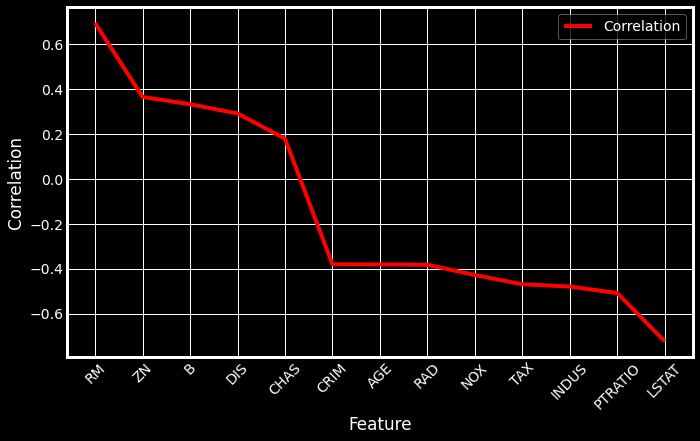

In [14]:
# plot the correlation of each input feature with the output feature (MEDV)
plt.figure(figsize=(10,6))
plt.plot(corr["MEDV"].sort_values(ascending=False)[1:],label="Correlation",color="red")
plt.ylabel("Correlation")
plt.xlabel("Feature")
plt.xticks(rotation=45)
plt.legend()
plt.show()

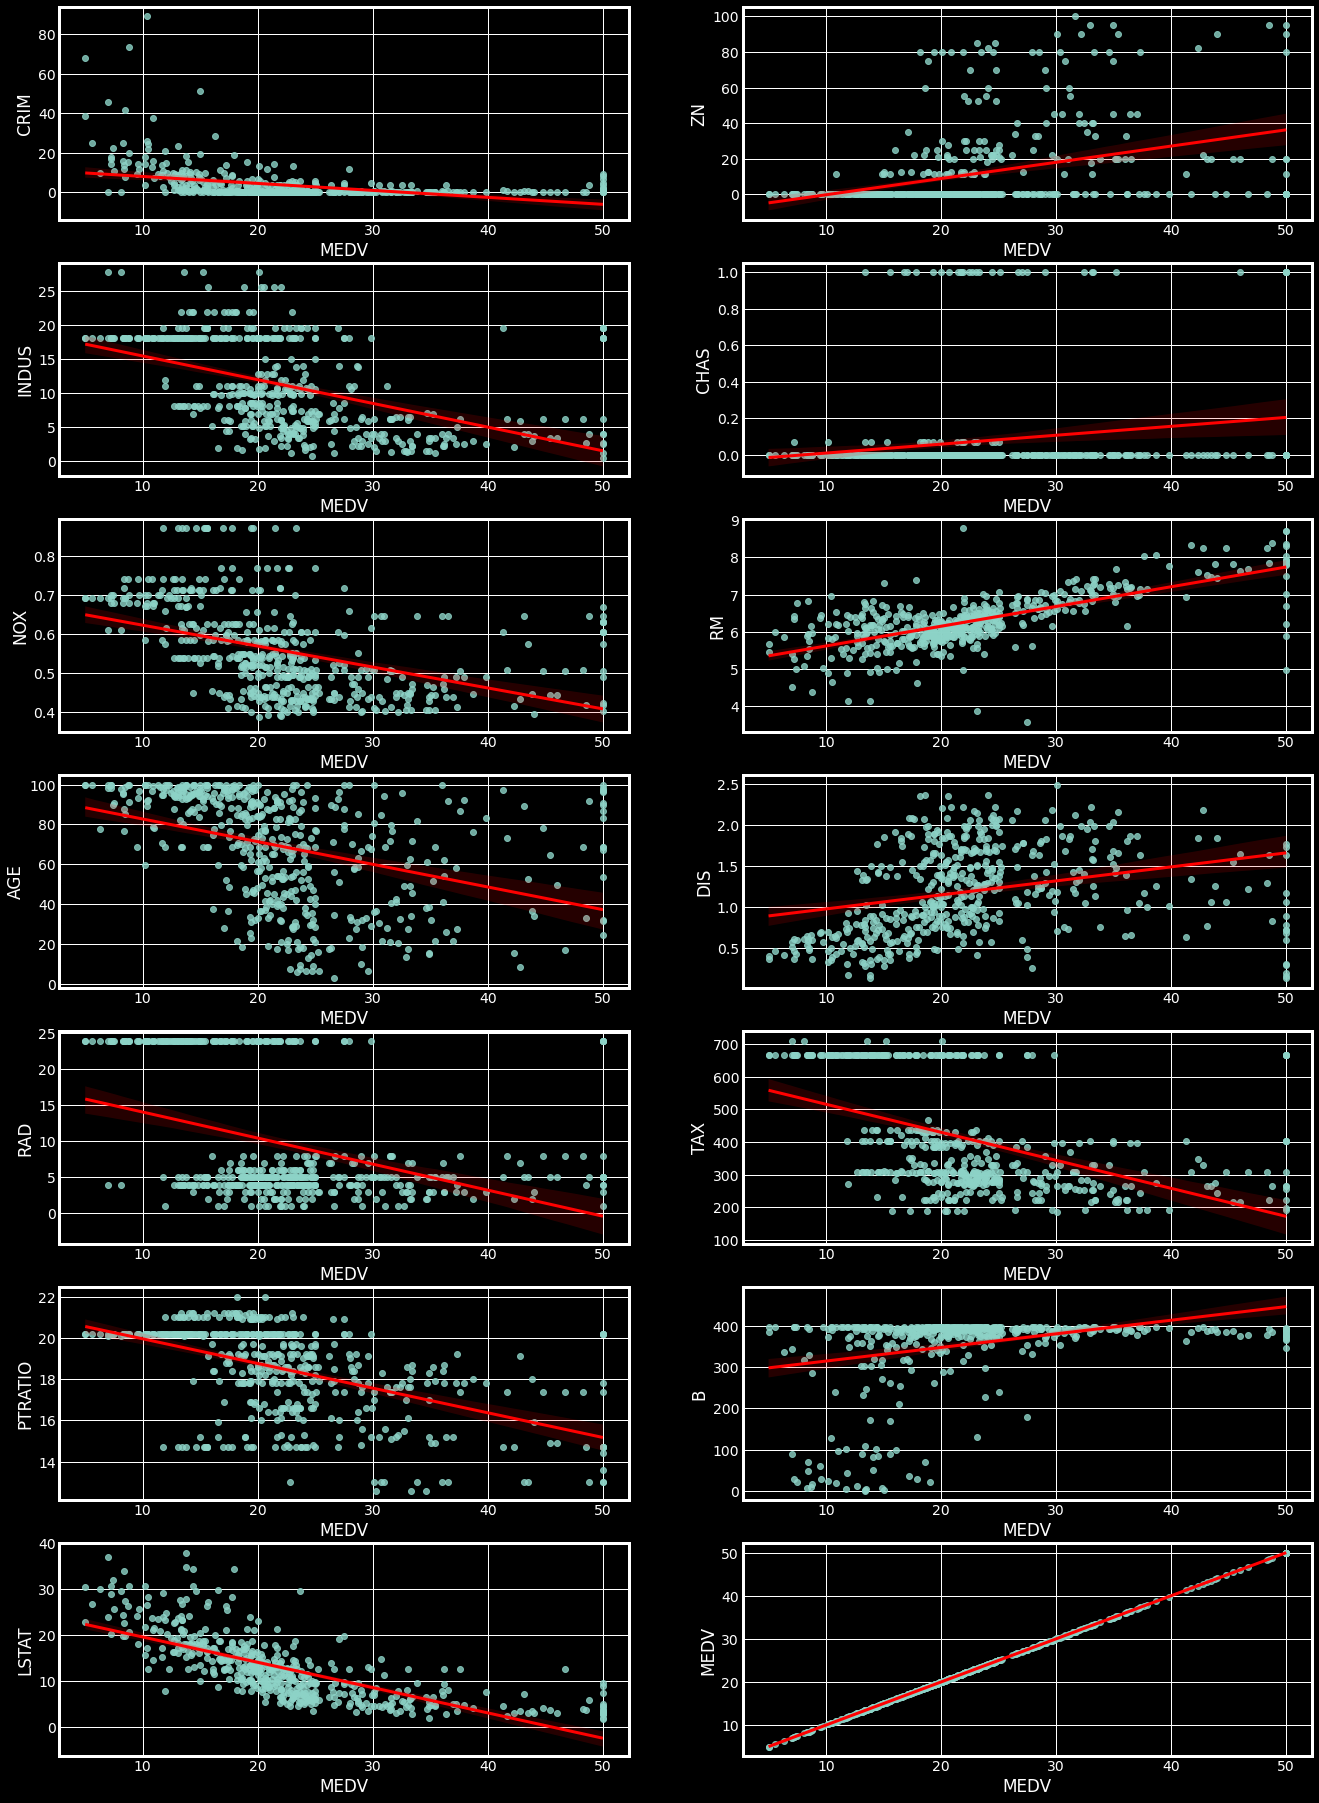

In [15]:
# plot price with the features
fig, ax1 = plt.subplots(7,2, figsize=(20,30))
columns = list(df.columns)
k = 0

for i in range(7):
  for j in range(2):
    sns.regplot(x='MEDV', y = columns[k], data=df, ax=ax1[i][j], line_kws={"color": "red", "linewidth":3})
    k+=1

plt.show()

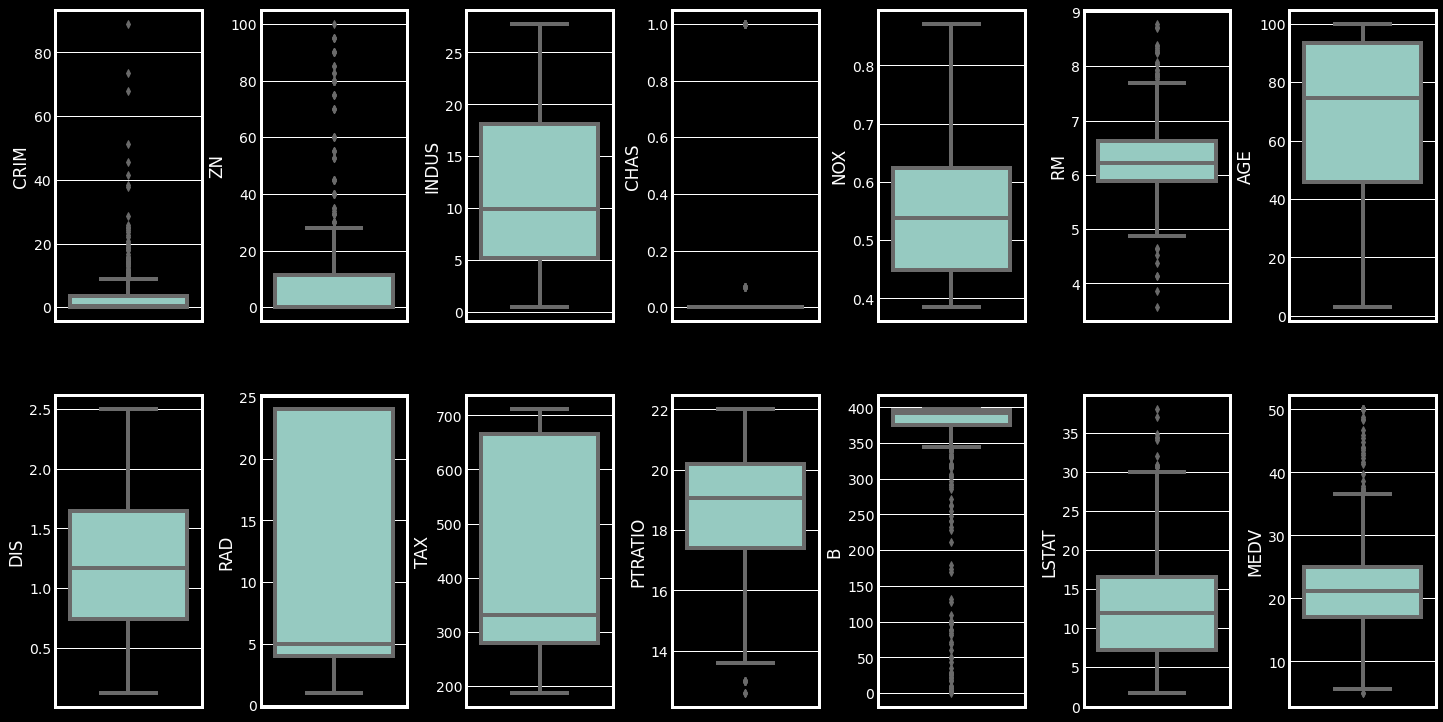

In [16]:
# looking for outliers using box plot
fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in df.items():
    sns.boxplot(y=k, data=df, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)
plt.show()

In [17]:
for k, v in df.items():
        q1 = v.quantile(0.25)
        q3 = v.quantile(0.75)
        irq = q3 - q1
        v_col = v[(v <= q1 - 1.5 * irq) | (v >= q3 + 1.5 * irq)]
        perc = np.shape(v_col)[0] * 100.0 / np.shape(df)[0]
        print("Column %s outliers = %.2f%%" % (k, perc))

Column CRIM outliers = 12.65%
Column ZN outliers = 13.44%
Column INDUS outliers = 0.00%
Column CHAS outliers = 100.00%
Column NOX outliers = 0.00%
Column RM outliers = 5.93%
Column AGE outliers = 0.00%
Column DIS outliers = 0.00%
Column RAD outliers = 0.00%
Column TAX outliers = 0.00%
Column PTRATIO outliers = 2.96%
Column B outliers = 15.22%
Column LSTAT outliers = 2.37%
Column MEDV outliers = 7.91%


In [18]:
# split the data to features and label
features = df.loc[:, df.columns!='MEDV'].values
label = df['MEDV']

# scale the features
scaler = StandardScaler()
X = scaler.fit_transform(features)
y = label

In [19]:
# split to train and test data
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [20]:
# XGBoost with hyperparameter tuning
xgbr = xgb.XGBRegressor(objective='reg:squarederror')

xgbr.fit(X_train,y_train) # train the data

# generate predicted values
y_pred = xgbr.predict(X_test)

print("Mean squared error: {}".format(mean_squared_error(y_pred,y_test)))
print("Accuracy score: {}%".format(r2_score(y_pred, y_test)*100))

Mean squared error: 6.969322221510423
Accuracy score: 89.34819754515605%


In [21]:
xgbr = xgb.XGBRegressor(objective='reg:squarederror',
                        random_state=50,
                        max_depth=6,
                        learning_rate = 0.08,
                        n_estimators = 500,
                        colsample_bylevel = 0.4,
                        reg_alpha = 1,
                        subsample = 1,
                       )
xgbr.fit(X_train,y_train) # train the data

# generate predicted values
y_pred = xgbr.predict(X_test)

print("Mean squared error: {}".format(mean_squared_error(y_pred,y_test)))
print("Accuracy score: {}%".format(r2_score(y_pred, y_test)*100))

Mean squared error: 6.923194386218182
Accuracy score: 89.10698573928705%


In [22]:
 params = { 'max_depth': [4,6,10],
           'learning_rate': [0.01, 0.08],
           'colsample_bylevel': [0.3, 0.4,0.5],
         }

xgbr = xgb.XGBRegressor(seed=50)
clf = GridSearchCV(estimator=xgbr, 
                   param_grid=params,
                   scoring='neg_mean_squared_error', 
                   verbose=1)
clf.fit(X_train, y_train)

print("Best parameters:", clf.best_params_)
print("Lowest Score: ", (clf.best_score_))

Fitting 5 folds for each of 18 candidates, totalling 90 fits
Best parameters: {'colsample_bylevel': 0.4, 'learning_rate': 0.08, 'max_depth': 10}
Lowest Score:  -11.782023738874642


In [23]:
mse_dict={}  
acc_dict={}
for n in range(100):
  X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2, random_state=n)
  xgbr = xgb.XGBRegressor(objective='reg:squarederror',
                            max_depth=6,
                            learning_rate = 0.08,
                            n_estimators = 500,
                            colsample_bylevel = 0.4,
                            reg_alpha = 1
                           )
  xgbr.fit(X_train, y_train)
  Y_pred = xgbr.predict(X_test)
  mse=mean_squared_error(y_test, y_pred)
  score=r2_score(y_test, y_pred)
  mse_dict.update({n:mse**(1/2.0)})
  acc_dict.update({n:abs(round((score*100),2))})

RMSE is lowest at 2.631 for random state [42] 


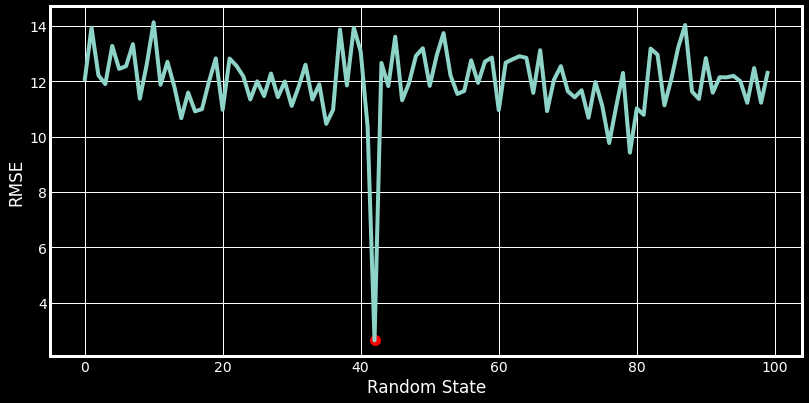

Accuracy is highest at 130.59 % for random state [41] 


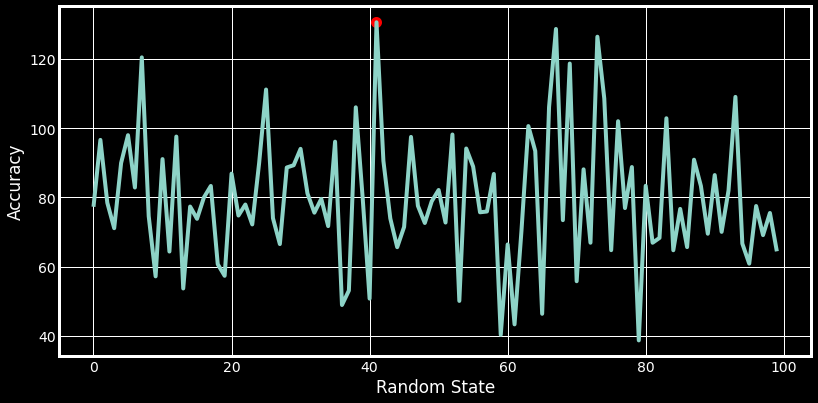

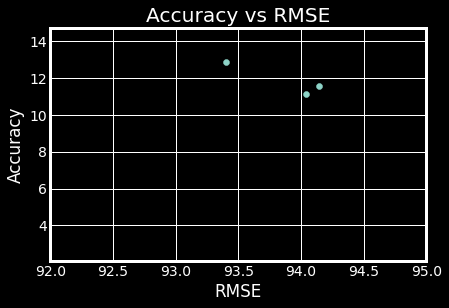

In [24]:
#Mean Square Error
lowest=min(mse_dict.values())
res = [key for key in mse_dict if mse_dict[key] == lowest]
mse_list=mse_dict.items()
k,v = zip(*mse_list) 
print("RMSE is lowest at {} for random state {} ".format(round((lowest),3),res))
#Plot RMSE values
plt.figure(figsize=(12,6))
plt.plot(k,v)
plt.scatter(res,lowest,color="red",lw=5)
plt.xlabel("Random State")
plt.ylabel("RMSE")
plt.grid(True)
plt.show()

#Accuracy
highest=max(acc_dict.values())
res1= [key for key in acc_dict if acc_dict[key] == highest]
acc_list=acc_dict.items()
k1,v1=zip(*acc_list)
print("Accuracy is highest at {} % for random state {} ".format(highest,res1))
#Plot Accuracy values
plt.figure(figsize=(12,6))
plt.plot(k1,v1)
plt.scatter(res1,highest,color="red",lw=5)
plt.xlabel("Random State")
plt.ylabel("Accuracy")
plt.grid(True)
plt.show()

#Plot accuracy vs RMSE
plt.scatter(v1,v)
plt.xlabel("RMSE")
plt.ylabel("Accuracy")
plt.title("Accuracy vs RMSE")
plt.xlim(92,95)
plt.grid(True)
plt.show()